In [1]:
import pandas as pd
import urllib as ul

import seaborn as sns

**Part Three [20 marks]**

 - 10 marks for successfully completing the tasks.
 - up to 6 marks for including one additional piece of analysis.
 - up to 4 marks for exceptionally well organised and executed approach.

We now want to see if there’s any evidence that these proteins work together. One way to look at this is to look at whether any of their proteins physically interact in a co-ordinated way. To assess this, you will now do some basic network analysis on protein-protein interaction data.

## Task 1

Create a plain text file of the NCBI UIDs for all of the gene-score 1 SFARI genes. Then, using the STRING website (https://string-db.org/) upload the gene-score 1 gene list, select “homo sapiens” as the species and hit search then click continue to visualise the protein-protein interaction network. In this network the genes are the nodes and the interactions between them the edges (connections). Click the “analysis” option near the bottom and report the following statistics: “number of nodes”, “number of edges” and “average node degree” (3 marks).

number of nodes:	193

number of edges:	990

average node degree:	10.3

avg. local clustering coefficient:	0.429

## Task 2

Click the “cluster” option and select “MCL clustering” with the default option. Download the “MCL clusters in TSV format” file. From this, find the two biggest clusters produced by the MCL clustering and use the PantherDB tool as in Part Two to analyse the function of genes in these clusters. This time instead of selecting “Biological Process” ontology use the “Pathway” ontology (6 marks).

In [2]:
clusters = pd.read_csv('string_MCL_clusters.tsv', sep='\t')

clusters.head()

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,22,ARID1B,9606.ENSP00000344546,AT-rich interactive domain-containing protein ...
1,MCL,1,Red,22,BCL11A,9606.ENSP00000338774,B-cell lymphoma/leukemia 11A; Transcription fa...
2,MCL,1,Red,22,CHD7,9606.ENSP00000392028,Chromodomain-helicase-DNA-binding protein 7; P...
3,MCL,1,Red,22,CREBBP,9606.ENSP00000262367,"CREB-binding protein; Acetylates histones, giv..."
4,MCL,1,Red,22,DNMT3A,9606.ENSP00000264709,DNA (cytosine-5)-methyltransferase 3A; Require...


In [3]:
cluster_count = pd.DataFrame(clusters.value_counts('cluster number'), columns = ['count']).sort_values('count', ascending = False)

cluster_count.head()

,count
cluster number,
1,22
2,22
3,11
4,8
5,7


In [5]:
cluster_1 = clusters.groupby('cluster number').get_group(1)
cluster_2 = clusters.groupby('cluster number').get_group(2)
cluster_1

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,22,ARID1B,9606.ENSP00000344546,AT-rich interactive domain-containing protein ...
1,MCL,1,Red,22,BCL11A,9606.ENSP00000338774,B-cell lymphoma/leukemia 11A; Transcription fa...
2,MCL,1,Red,22,CHD7,9606.ENSP00000392028,Chromodomain-helicase-DNA-binding protein 7; P...
3,MCL,1,Red,22,CREBBP,9606.ENSP00000262367,"CREB-binding protein; Acetylates histones, giv..."
4,MCL,1,Red,22,DNMT3A,9606.ENSP00000264709,DNA (cytosine-5)-methyltransferase 3A; Require...
5,MCL,1,Red,22,EP300,9606.ENSP00000263253,Histone acetyltransferase p300; Functions as h...
6,MCL,1,Red,22,KDM5B,9606.ENSP00000356234,Lysine-specific demethylase 5B; Histone demeth...
7,MCL,1,Red,22,KMT2A,9606.ENSP00000436786,Histone-lysine N-methyltransferase 2A; Histone...
8,MCL,1,Red,22,KMT2C,9606.ENSP00000262189,Histone-lysine N-methyltransferase 2C; Histone...
9,MCL,1,Red,22,KMT2E,9606.ENSP00000312379,Histone-lysine N-methyltransferase 2E; Histone...


In [6]:
# retrieve the Homo_sapiens file
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz','Homo_sapiens.gene_info.gz')

Homo = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')

Homo.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20201124,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20201124,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20201124,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171428,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20201124,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156006,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20201124,-


In [9]:
Map_1 = pd.merge(cluster_1, Homo, left_on = 'protein name', right_on = 'Symbol')
Map_1 = pd.DataFrame(Map_1, columns = ['GeneID', 'Symbol'])

print(len(Map_1))
Map_1.head()

22


,GeneID,Symbol
0,57492,ARID1B
1,53335,BCL11A
2,55636,CHD7
3,1387,CREBBP
4,1788,DNMT3A


In [10]:
Map_2 = pd.merge(cluster_2, Homo, left_on = 'protein name', right_on = 'Symbol')
Map_2 = pd.DataFrame(Map_2, columns = ['GeneID', 'Symbol'])

print(len(Map_2))
Map_2.head()

22


,GeneID,Symbol
0,23229,ARHGEF9
1,8573,CASK
2,56853,CELF4
3,1826,DSCAM
4,1995,ELAVL3


In [11]:
Map_1.to_csv('UID_cluster_1.csv')
Map_2.to_csv('UID_cluster_2.csv')

In [37]:
data_1 = pd.DataFrame(pd.read_csv('BarChart_cluster_1.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_1 = data_1.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_2 = pd.DataFrame(pd.read_csv('BarChart_cluster_2.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2 = data_2.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_1.head()

,GO_name,genes,hit_against_total_genes,hit_against_total_Process_hits
0,Gonadotropin-releasing hormone receptor pathwa...,2,9.1%,10.0%
1,p53 pathway (P00059),2,9.1%,10.0%
2,Huntington disease (P00029),2,9.1%,10.0%
3,Hypoxia response via HIF activation (P00030),1,4.5%,5.0%
4,Wnt signaling pathway (P00057),6,27.3%,30.0%


In [4]:
data_2.head()

,GO_name,genes,hit_against_total_genes,hit_against_total_Process_hits
0,Synaptic vesicle trafficking (P05734),1,4.5%,16.7%
1,Inflammation mediated by chemokine and cytokin...,1,4.5%,16.7%
2,Metabotropic glutamate receptor group III path...,1,4.5%,16.7%
3,Parkinson disease (P00049),1,4.5%,16.7%
4,Ionotropic glutamate receptor pathway (P00037),2,9.1%,33.3%


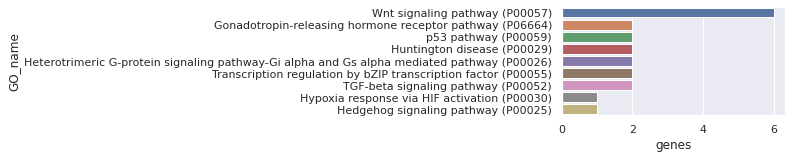

In [38]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(4, 2)})
sns.barplot(data = data_1.sort_values('genes', ascending = False), x = 'genes', y = 'GO_name', orient = 'h')

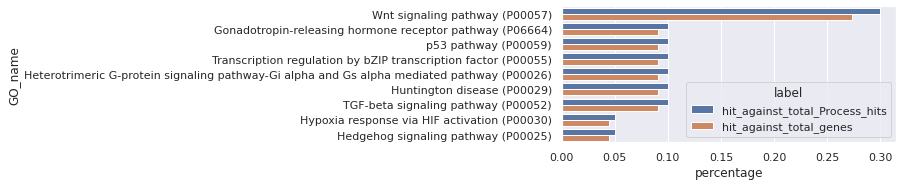

In [39]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(6, 2.5)})

data_1_percent = data_1.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_1_percent['percentage'] = data_1_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_1_percent.sort_values('percentage', ascending = False), x = 'percentage', y = 'GO_name', hue = 'label')

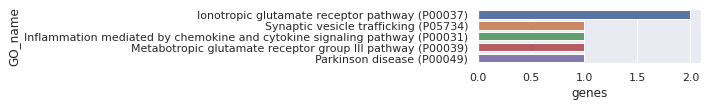

In [40]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(4, 1)})
sns.barplot(data = data_2.sort_values('genes', ascending = False), x = 'genes', y = 'GO_name', orient = 'h')

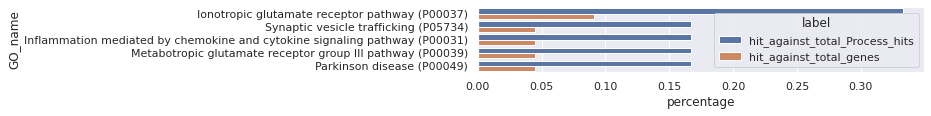

In [41]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(8, 1.2)})

data_2_percent = data_2.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_2_percent['percentage'] = data_2_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_2_percent.sort_values('percentage', ascending = False), x = 'percentage', y = 'GO_name', hue = 'label')

## Task 3

Click the “exports” option and download the network as a “bitmap image” file (1 mark).

## additional piece of analysis

In [48]:
clusters_2 = pd.read_csv('string_MCL_clusters_2.tsv', sep='\t')

clusters_2.head()

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,14,DLG2,9606.ENSP00000365272,Disks large homolog 2; Required for perception...
1,MCL,1,Red,14,DLGAP1,9606.ENSP00000316377,Disks large-associated protein 1; Part of the ...
2,MCL,1,Red,14,GPHN,9606.ENSP00000417901,Gephyrin; Microtubule-associated protein invol...
3,MCL,1,Red,14,GRIA1,9606.ENSP00000428994,Glutamate receptor 1; Ionotropic glutamate rec...
4,MCL,1,Red,14,GRID1,9606.ENSP00000330148,"Glutamate receptor ionotropic, delta-1; Recept..."


In [40]:
cluster_count_2 = pd.DataFrame(clusters_2.value_counts('cluster number'), columns = ['count']).sort_values('count', ascending = False)

cluster_count_2.head()

,count
cluster number,
1,14
2,9
3,6
4,5
5,5


In [41]:
cluster_2_1 = clusters_2.groupby('cluster number').get_group(1)
cluster_2_2 = clusters_2.groupby('cluster number').get_group(2)
cluster_2_1

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,14,DLG2,9606.ENSP00000365272,Disks large homolog 2; Required for perception...
1,MCL,1,Red,14,DLGAP1,9606.ENSP00000316377,Disks large-associated protein 1; Part of the ...
2,MCL,1,Red,14,GPHN,9606.ENSP00000417901,Gephyrin; Microtubule-associated protein invol...
3,MCL,1,Red,14,GRIA1,9606.ENSP00000428994,Glutamate receptor 1; Ionotropic glutamate rec...
4,MCL,1,Red,14,GRID1,9606.ENSP00000330148,"Glutamate receptor ionotropic, delta-1; Recept..."
5,MCL,1,Red,14,GRIK2,9606.ENSP00000397026,"Glutamate receptor ionotropic, kainate 2; Iono..."
6,MCL,1,Red,14,GRIK5,9606.ENSP00000262895,"Glutamate receptor ionotropic, kainate 5; Rece..."
7,MCL,1,Red,14,GRIN1,9606.ENSP00000360608,"Glutamate receptor ionotropic, NMDA 1; Compone..."
8,MCL,1,Red,14,GRIN2A,9606.ENSP00000379818,"Glutamate receptor ionotropic, NMDA 2A; Compon..."
9,MCL,1,Red,14,GRIP1,9606.ENSP00000381098,Glutamate receptor-interacting protein 1; May ...


In [43]:
Map_2_1 = pd.merge(cluster_2_1, Homo, left_on = 'protein name', right_on = 'Symbol')
Map_2_1 = pd.DataFrame(Map_2_1, columns = ['GeneID', 'Symbol'])

print(len(Map_2_1))
Map_2_1.head()

14


,GeneID,Symbol
0,1740,DLG2
1,9229,DLGAP1
2,10243,GPHN
3,2890,GRIA1
4,2894,GRID1


In [44]:
Map_2_2 = pd.merge(cluster_2_2, Homo, left_on = 'protein name', right_on = 'Symbol')
Map_2_2 = pd.DataFrame(Map_2_2, columns = ['GeneID', 'Symbol'])

print(len(Map_2_2))
Map_2_2.head()

8


,GeneID,Symbol
0,57634,EP400
1,3720,JARID2
2,8242,KDM5C
3,7403,KDM6A
4,5245,PHB


In [45]:
Map_2_1.to_csv('UID_cluster_2_1.csv')
Map_2_2.to_csv('UID_cluster_2_2.csv')

In [ ]:
data_2_1 = pd.DataFrame(pd.read_csv('BarChart_cluster_2_1.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2_1 = data_2_1.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_2 = pd.DataFrame(pd.read_csv('BarChart_cluster_2.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2 = data_2.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_1.head()

In [47]:
clusters_3 = pd.read_csv('string_MCL_clusters_3.tsv', sep='\t')

clusters_3.head()

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,16,BZRAP1,9606.ENSP00000345824,Benzodiazepine receptor (peripheral) associate...
1,MCL,1,Red,16,CADPS,9606.ENSP00000373215,Calcium-dependent secretion activator 1; Calci...
2,MCL,1,Red,16,KCNC1,9606.ENSP00000265969,Potassium voltage-gated channel subfamily C me...
3,MCL,1,Red,16,KIF5C,9606.ENSP00000393379,Kinesin heavy chain isoform 5C; Mediates dendr...
4,MCL,1,Red,16,LIN7B,9606.ENSP00000221459,Protein lin-7 homolog B; Plays a role in estab...


In [49]:
cluster_3_1 = clusters_3.groupby('cluster number').get_group(1)
cluster_3_2 = clusters_3.groupby('cluster number').get_group(2)
cluster_3_1

,#clustering method,cluster number,cluster color,gene count,protein name,protein identifier,protein description
0,MCL,1,Red,16,BZRAP1,9606.ENSP00000345824,Benzodiazepine receptor (peripheral) associate...
1,MCL,1,Red,16,CADPS,9606.ENSP00000373215,Calcium-dependent secretion activator 1; Calci...
2,MCL,1,Red,16,KCNC1,9606.ENSP00000265969,Potassium voltage-gated channel subfamily C me...
3,MCL,1,Red,16,KIF5C,9606.ENSP00000393379,Kinesin heavy chain isoform 5C; Mediates dendr...
4,MCL,1,Red,16,LIN7B,9606.ENSP00000221459,Protein lin-7 homolog B; Plays a role in estab...
5,MCL,1,Red,16,PPFIA1,9606.ENSP00000253925,Liprin-alpha-1; May regulate the disassembly o...
6,MCL,1,Red,16,PTPRB,9606.ENSP00000334928,Receptor-type tyrosine-protein phosphatase bet...
7,MCL,1,Red,16,RIMS2,9606.ENSP00000262231,Regulating synaptic membrane exocytosis protei...
8,MCL,1,Red,16,SNAP25,9606.ENSP00000254976,Synaptosomal-associated protein 25; t-SNARE in...
9,MCL,1,Red,16,STX1A,9606.ENSP00000222812,Syntaxin-1A; Plays a role in hormone and neuro...


In [50]:
Map_3_1 = pd.merge(cluster_3_1, Homo, left_on = 'protein name', right_on = 'Symbol')
Map_3_1 = pd.DataFrame(Map_3_1, columns = ['GeneID', 'Symbol'])

print(len(Map_3_1))
Map_3_1.head()

15


,GeneID,Symbol
0,8618,CADPS
1,3746,KCNC1
2,3800,KIF5C
3,64130,LIN7B
4,8500,PPFIA1


In [51]:
Map_3_2 = pd.merge(cluster_3_2, Homo, left_on = 'protein name', right_on = 'Symbol')
Map_3_2 = pd.DataFrame(Map_3_2, columns = ['GeneID', 'Symbol'])

print(len(Map_3_2))
Map_3_2.head()

12


,GeneID,Symbol
0,142686,ASB14
1,8945,BTRC
2,80204,FBXO11
3,51725,FBXO40
4,64219,PJA1


In [52]:
Map_3_1.to_csv('UID_cluster_3_1.csv')
Map_3_2.to_csv('UID_cluster_3_2.csv')

In [23]:
data_1 = pd.DataFrame(pd.read_csv('BarChart_cluster_2_1.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_1 = data_1.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_2 = pd.DataFrame(pd.read_csv('BarChart_cluster_2_2.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2 = data_2.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_1.head()

,GO_name,genes,hit_against_total_genes,hit_against_total_Process_hits
0,Muscarinic acetylcholine receptor 1 and 3 sign...,2,14.3%,10.0%
1,Huntington disease (P00029),4,28.6%,20.0%
2,Metabotropic glutamate receptor group I pathwa...,3,21.4%,15.0%
3,Metabotropic glutamate receptor group III path...,5,35.7%,25.0%
4,Ionotropic glutamate receptor pathway (P00037),6,42.9%,30.0%


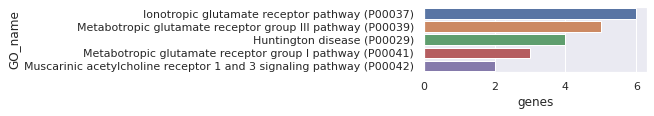

In [26]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(4, 1.2)})
sns.barplot(data = data_1.sort_values('genes', ascending = False), x = 'genes', y = 'GO_name', orient = 'h')

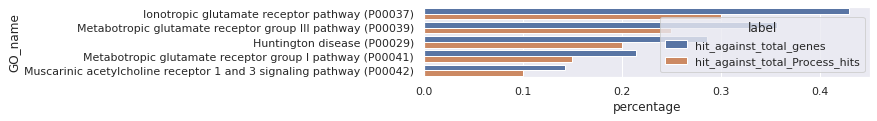

In [28]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(8, 1.3)})

data_1_percent = data_1.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_1_percent['percentage'] = data_1_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_1_percent.sort_values('percentage', ascending = False), x = 'percentage', y = 'GO_name', hue = 'label')

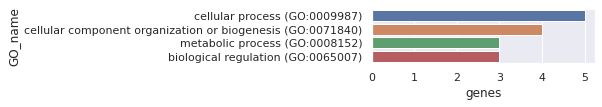

In [29]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(4, 1)})
sns.barplot(data = data_2.sort_values('genes', ascending = False), x = 'genes', y = 'GO_name', orient = 'h')

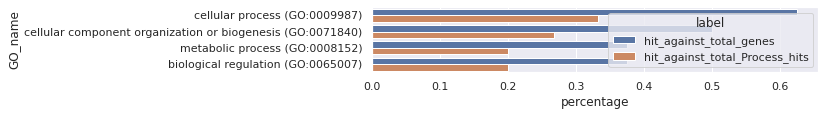

In [31]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(8, 1.2)})

data_2_percent = data_2.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_2_percent['percentage'] = data_2_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_2_percent.sort_values('percentage', ascending = False), x = 'percentage', y = 'GO_name', hue = 'label')

In [32]:
data_1 = pd.DataFrame(pd.read_csv('BarChart_cluster_3_1.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_1 = data_1.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_2 = pd.DataFrame(pd.read_csv('BarChart_cluster_3_2.txt', sep = "\t", header = None), columns = [1, 2, 3, 4])
data_2 = data_2.rename(columns = {1: 'GO_name', 2: 'genes', 3: 'hit_against_total_genes', 4: 'hit_against_total_Process_hits'})

data_1.head()

,GO_name,genes,hit_against_total_genes,hit_against_total_Process_hits
0,Metabotropic glutamate receptor group III path...,2,13.3%,5.9%
1,Ionotropic glutamate receptor pathway (P00037),1,6.7%,2.9%
2,Angiogenesis (P00005),1,6.7%,2.9%
3,Opioid proopiomelanocortin pathway (P05917),1,6.7%,2.9%
4,Opioid prodynorphin pathway (P05916),1,6.7%,2.9%


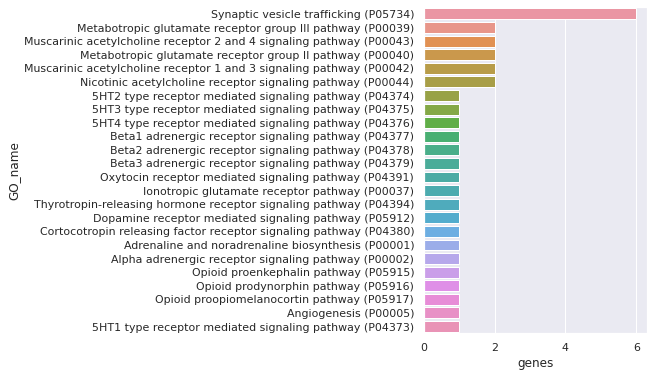

In [33]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(4, 6)})
sns.barplot(data = data_1.sort_values('genes', ascending = False), x = 'genes', y = 'GO_name', orient = 'h')

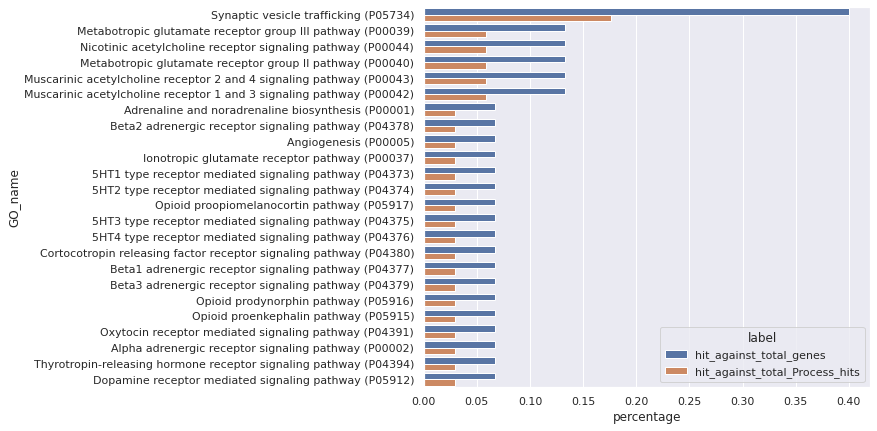

In [34]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(8, 7)})

data_1_percent = data_1.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_1_percent['percentage'] = data_1_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_1_percent.sort_values('percentage', ascending = False), x = 'percentage', y = 'GO_name', hue = 'label')

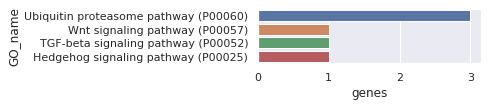

In [35]:
# plot the same image as the pantherDB
sns.set(rc={'figure.figsize':(4, 1)})
sns.barplot(data = data_2.sort_values('genes', ascending = False), x = 'genes', y = 'GO_name', orient = 'h')

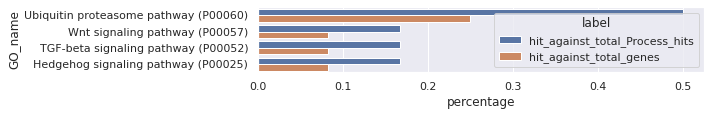

In [36]:
# plot the percentage of hits
sns.set(rc={'figure.figsize':(8, 1.2)})

data_2_percent = data_2.melt(id_vars = ['GO_name'], value_vars = ['hit_against_total_genes', 'hit_against_total_Process_hits'], var_name = 'label', value_name = 'percentage')
data_2_percent['percentage'] = data_2_percent['percentage'].str.replace(r'%', r'').astype('float') / 100.0
# data_1_percent

sns.barplot(data = data_2_percent.sort_values('percentage', ascending = False), x = 'percentage', y = 'GO_name', hue = 'label')

After repeating the same process above for the other 2 gene score lists, it is fond that the number of genes in the biggest cluster of gene score 2 and 3 are much less than that of gene score 1. The pathway GO terms hits of 3 gene score lists varies a lot while the other ontologies are basically the same except with different hit rates. 

## Requirement

Compare and contrast your results from the two clusters above, commenting on the functional differences highlighted by the Panther tool. Also, compare back to your findings from Part Two.

Possible extensions would be to repeat these analyses with other gene-score restricted lists and with them all combined. Also, using other ontologies with the Panther tool to explore cluster functions.

## Conclusion

From the results in part 3, on the contrast to part 2, the 2 clusters have very different GO term hits. The first cluster is mainly about signaling and transcription and the second cluster is mainly about receptor. This shows that there are also several different clusters of genes in one gene score category. And Autism may be related not only to a special function but to a combination of different genes. 

From the additional analysis, it is shown that the number of genes in the biggest clusters of gene score 2 and 3 are much less than that of gene score 1 which means that the connections between genes of score 1 are closer to that of genes of score 2 and 3. 

The pathway GO terms hits of 3 gene score lists however, varies a lot while the other ontologies are basically the same except with different hit rates. 